# World Vaccination Progress EDA

Okay, we have a vaccine; that's exciting news! But how are we doing? Is the vaccination progressing quick enough? This lecture, we will explore a dataset downloaded from `kaggle`, you can follow [this link](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) to learn more about this dataset. The dataset is collected by the organization [Our World in Data](https://ourworldindata.org/) that publish papers about solutions to world issues.

In [1]:
# list of imports
import scipy as sp
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import datascience
import matplotlib.pyplot as plt
%matplotlib inline
from datascience import Table
import seaborn as sns

We very briefly walked through how to interact with an API (it's very simple!) If you are interested, you can look at more in the official `github` page: https://github.com/Kaggle/kaggle-api

In [2]:
# kaggle API
! kaggle datasets list -s "covid vaccination" --sort-by 'hottest' | head -10

ref                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/covid-world-vaccination-progress            COVID-19 World Vaccination Progress               101KB  2021-03-01 08:15:06          19482        888  1.0              
fedesoriano/coronavirus-covid19-vaccinations-data  COVID-19 World Vaccination Progress Data            3MB  2021-01-27 06:37:50            186          7  1.0              
keplaxo/twitter-vaccination-dataset                Twitter Vaccination Dataset                       305MB  2020-04-15 17:33:37            346         13  0.9411765        
padmajabuggaveeti/covid-vaccination-dataset-2021   COVID VACCINATION DATASET - 2021                   29KB  2021-01-27 11:04:44        

In [4]:
# find the files in dataset
! kaggle datasets files gpreda/covid-world-vaccination-progress -v

In [7]:
# download the file in csv format
! kaggle datasets download -f country_vaccinations.csv -p "./data" gpreda/covid-world-vaccination-progress
! echo ">>> check if data is there"
! ls "./data"

country_vaccinations.csv: Skipping, found more recently modified local copy (use --force to force download)
>>> check if data is there
country_vaccinations.csv


Data wrangling and EDA are the most initial steps in our data science lifecyle. Most often than not in research, the data is newly collected or simulated; no one has had time to write up extensive descriptions of the data. Therefore, an important step is getting to know our data.

In [9]:
# read data in
path = "./data/"
filename = "country_vaccinations.csv"
read_path = path + filename
vax = pd.read_csv(read_path)
# what columns does it have
# what are data types
vax.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Now that we have the data, let's load it in and look at what it has to offer. To learn more about this dataset, it is often helpful to look at its `README` file or just directly go to `kaggle` and read the descriptions. https://www.kaggle.com/gpreda/covid-world-vaccination-progress

The description of columns is usually called a `data dictionary`. By reading the documentation we learn that this data is directly sourced from John Hopkins University: https://github.com/owid/covid-19-data/tree/master/public/data. This is sometimes important to know because different organizations, institutions, or even individuals often collect and record data following different conventions (how are `NA` values represented, how are categorical values stored, etc.). You can explore the data source's description a little more closely: https://ourworldindata.org/coronavirus-source-data.

In [10]:
# how much space does this dataset take?
display(vax.memory_usage())
# how many kilobytes?
print("{} kB".format(np.round(vax.memory_usage().sum()/2**10, 2)))

Index                                    128
country                                35480
iso_code                               35480
date                                   35480
total_vaccinations                     35480
people_vaccinated                      35480
people_fully_vaccinated                35480
daily_vaccinations_raw                 35480
daily_vaccinations                     35480
total_vaccinations_per_hundred         35480
people_vaccinated_per_hundred          35480
people_fully_vaccinated_per_hundred    35480
daily_vaccinations_per_million         35480
vaccines                               35480
source_name                            35480
source_website                         35480
dtype: int64

519.85 kB


A more comprehensive description of the data types is `df.info` function.

In [11]:
vax.info();
# vax.dim, vix.shape, vix.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 15 columns):
country                                4435 non-null object
iso_code                               4131 non-null object
date                                   4435 non-null object
total_vaccinations                     2916 non-null float64
people_vaccinated                      2483 non-null float64
people_fully_vaccinated                1662 non-null float64
daily_vaccinations_raw                 2467 non-null float64
daily_vaccinations                     4281 non-null float64
total_vaccinations_per_hundred         2916 non-null float64
people_vaccinated_per_hundred          2483 non-null float64
people_fully_vaccinated_per_hundred    1662 non-null float64
daily_vaccinations_per_million         4281 non-null float64
vaccines                               4435 non-null object
source_name                            4435 non-null object
source_website                         4435 

```'b'       boolean
'i'       (signed) integer
'u'       unsigned integer
'f'       floating-point
'c'       complex-floating point
'O'       (Python) objects
'S', 'a'  (byte-)string
'U'       Unicode
'V'       raw data (void)```

In [13]:
# what are these "object" values, let's look at "country" for example
countries = vax['country']
countries.dtype # probably not very helpful

dtype('O')

In [14]:
type(countries[0])

str

Now that we know what the columns are and (roughly) what they represent, let's also look at the table as a whole.

### Q: What is the granularity of this dataset?

Discussion: Is it better to have more granularity, or less granularity?

In [15]:
vax.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


We have quite a few numerical features, such as `people_vaccinated`, `daily_vaccinations` ... We may be generally interested in some statistics.

In [20]:
# compute mean
sum(vax['daily_vaccinations'])/len(vax['daily_vaccinations']) # comments?
vax['daily_vaccinations'].mean()

55316.880168185

We have some `NaN` values, this can be due to a few different reasons depending on context. But remember: 
**If there is no data, it does not mean that there is no problem**.

### Q: Is getting rid of data points that contain `NaN`'s a good idea?

Now that we know in general:
* the (physical) size of data
* the dimensions of data
* what each row / column represents
* the data types contained in this data
* analmolies

Now we can dive into the data values themselves and find out what properties this dataset has.

In [24]:
# what happens if we get rid of NaN's
vax_clean = vax.dropna()
vax_clean = vax_clean.sort_values(by="date", ascending=False).reset_index()
display(vax_clean.head())
print(vax_clean.shape)

# so getting rid of NaN's may not always be the best idea

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,4342,United States,USA,2021-02-27,72806180.0,48435536.0,23698627.0,2352116.0,1645240.0,21.77,14.48,7.09,4919.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
1,3417,Romania,ROU,2021-02-27,1521737.0,905142.0,616595.0,15704.0,24351.0,7.91,4.71,3.21,1266.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Romania,https://vaccinare-covid.gov.ro/wp-content/uplo...
2,580,Brazil,BRA,2021-02-27,8322042.0,6437836.0,1884206.0,220255.0,215553.0,3.92,3.03,0.89,1014.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
3,1981,Indonesia,IDN,2021-02-27,2598535.0,1616165.0,982370.0,149084.0,91687.0,0.95,0.59,0.36,335.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
4,2794,Morocco,MAR,2021-02-27,3597903.0,3435997.0,161906.0,173608.0,162387.0,9.75,9.31,0.44,4399.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Ministry of Health,http://www.covidmaroc.ma/Documents/BULLETIN/27...


(1316, 16)


How many countries are represented?

In [28]:
np.unique(vax['country'])

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'Bolivia', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'England', 'Estonia', 'Faeroe Islands', 'Falkland Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Greenland',
       'Guernsey', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan',
       'Jersey', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Maldives',
       'Malta', 'Mauritius', 'Mexico', 'Monaco', 'Montenegro', 'Morocco',
       'Myanmar', 'Nepal', 'Netherlands', 'New Zealand',
       'Northern Cyprus', 

How much data do we have on each country, are they equal?

In [30]:
vax['country'].value_counts()

Lithuania         82
Scotland          76
United Kingdom    76
Wales             76
England           76
                  ..
Senegal            5
South Korea        3
Ukraine            3
Saint Helena       1
Greenland          1
Name: country, Length: 112, dtype: int64

What is the range of dates?

In [33]:
# these achieves the same goal
print("the dates are from {} to {}".format(np.amin(vax['date']), np.amax(vax['date'])))
# or you can do this
(vax['date'].min(), vax['date'].max())
# so, about 3 months worth of data

the dates are from 2020-12-08 to 2021-02-27


('2020-12-08', '2021-02-27')

How is the world vaccination progressing? Namely, on average, how many people get vaccinated everyday?

In [34]:
# these achieves the same goal
print("daily vaccination average: {}".format(vax['daily_vaccinations'].mean()))
# or you can do this
print("daily vaccination average: {}".format(np.mean(vax['daily_vaccinations'])))
# that's a bit slow, but we are making progress

daily vaccination average: 55316.880168185
daily vaccination average: 55316.880168185


In [ ]:
# you can do numerical computations on pd.Series directly
vax['people_fully_vaccinated'] / vax['']

Here is a quick way: `df.describe` gives you some quick statistics of your numerical data. It has a few advantages, but need to be careful about interpretability.

In [35]:
vax.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.916000e+03,2.483000e+03,1.662000e+03,2.467000e+03,4.281000e+03,2916.000000,2483.000000,1662.000000,4281.000000
mean,1.709487e+06,1.481442e+06,4.888581e+05,7.517774e+04,5.531688e+04,7.078261,5.751832,2.262515,2404.288951
std,5.774372e+06,4.646374e+06,1.899838e+06,2.111072e+05,1.744120e+05,13.147480,9.446641,5.501138,4378.201585
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.154575e+04,2.799900e+04,1.119425e+04,2.282000e+03,1.121000e+03,0.620000,0.600000,0.212500,321.000000
50%,2.049345e+05,1.822800e+05,5.062800e+04,1.183300e+04,5.857000e+03,2.735000,2.530000,0.840000,1064.000000
75%,8.565680e+05,7.471645e+05,2.607428e+05,5.366500e+04,2.704700e+04,6.675000,5.200000,1.935000,2190.000000
max,7.280618e+07,4.843554e+07,2.369863e+07,2.352116e+06,1.916190e+06,106.530000,67.410000,39.110000,54264.000000


Now we understand better the numerical properties of our data. We can start to ask some more complex questions.

## Q: Who's not vaccinated?

$$
\text{(Total number of people vaccinated per hundred) } =\frac{(\text{Total number of people fully vaccinated})}{(\text{Total population up to the date in the country})} \times 100\%
$$

In [37]:
vax['total_population'] = vax['people_fully_vaccinated'] / (vax['total_vaccinations_per_hundred'] / 100)
vax[['country', 'total_population']].dropna()

,country,total_population
23,Albania,5.000000e+03
30,Albania,1.095000e+06
38,Albania,1.018333e+06
39,Albania,5.554545e+05
43,Albania,2.847826e+05
...,...,...
4420,Wales,1.705384e+05
4421,Wales,1.993241e+05
4422,Wales,2.296220e+05
4423,Wales,2.569384e+05


Now we can see who's not vaccinated in each country.

In [38]:
vax['people_unvaccinated'] = vax['total_population'] - vax['people_fully_vaccinated']
vax[['country', 'people_unvaccinated']].dropna()

,country,people_unvaccinated
23,Albania,4.999000e+03
30,Albania,1.094562e+06
38,Albania,1.017722e+06
39,Albania,5.548435e+05
43,Albania,2.841276e+05
...,...,...
4420,Wales,1.208094e+05
4421,Wales,1.400451e+05
4422,Wales,1.597710e+05
4423,Wales,1.768764e+05


We can even ask further questions as to which country is most recently, most vaccinated, and most un-vaccinated?

In [39]:
# let's move to the same recorded day
vax_curr = vax[vax['date'] == '2021-02-26']

In [40]:
vax.iloc[vax_curr['people_fully_vaccinated'].idxmax]

country                                                                    United States
iso_code                                                                             USA
date                                                                          2021-02-26
total_vaccinations                                                           7.04541e+07
people_vaccinated                                                            4.71842e+07
people_fully_vaccinated                                                      2.26134e+07
daily_vaccinations_raw                                                       2.17995e+06
daily_vaccinations                                                           1.55272e+06
total_vaccinations_per_hundred                                                     21.07
people_vaccinated_per_hundred                                                      14.11
people_fully_vaccinated_per_hundred                                                 6.76
daily_vaccinations_pe

In [41]:
vax.iloc[vax_curr['people_fully_vaccinated'].idxmin]

country                                                                      Isle of Man
iso_code                                                                             IMN
date                                                                          2021-02-26
total_vaccinations                                                                 19884
people_vaccinated                                                                  13600
people_fully_vaccinated                                                             6284
daily_vaccinations_raw                                                              1089
daily_vaccinations                                                                   391
total_vaccinations_per_hundred                                                     23.38
people_vaccinated_per_hundred                                                      15.99
people_fully_vaccinated_per_hundred                                                 7.39
daily_vaccinations_pe

There are many more topics we can explore (feel free to try to answer these on your own: How effective are vaccines? What's the busiest day, is there a pattern?). Notice that all we are doing are just computing simple statistics, but the key is to learn about our data in that: (1) get familiar with manipulating this dataset and (2) explore the **scope** and **temporality** of this dataset.

# Visualizing Our Data

Depending on our needs and whether the data is categorical / numerical, we can have different ways to look at data. We can understand the dataset in a much more direct and intuitive way by visualizing. We will discuss more in the upcoming lectures.

Today, we will be working with `datascience` which provides some useful visualization tools, and see a few examples of more standard packages such as `pandas`, `matplotlib` and `seaborn`.

## Q: Is the vaccination rate in the United States looking up?

In [43]:
# focus on the US
us_vax = vax[vax['country'] == "United States"]
us_vax.shape

(70, 17)

What is a good way to understand the temporal trend of a numerical value?

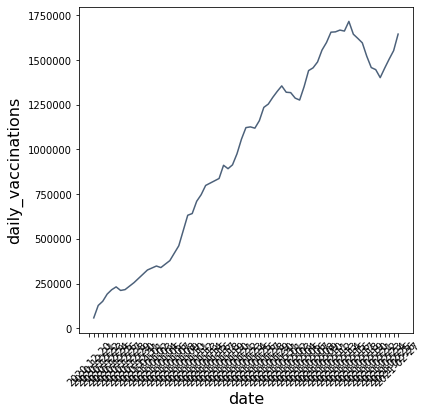

In [44]:
us_daily_trend = Table().with_columns([
    'date', us_vax['date'], 
    'daily_vaccinations', us_vax['daily_vaccinations']
])

# plot
#help(us_daily_trend.plot)
us_daily_trend.plot('date');
plt.xticks(rotation = 45);

How to do this in `pandas`? Look at `pd.DataFrame().plot`.

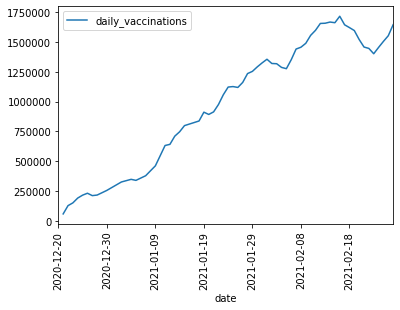

In [49]:

us_vax.plot('date', 'daily_vaccinations', rot=90);

We can get even more detailed plots with `matplotlib`.

Here are a few `stackexchange` posts I consulted. Most often than not, your question has been answered.

* https://stackoverflow.com/questions/33382619/plot-a-horizontal-line-using-matplotlib
* https://stackoverflow.com/questions/23248435/fill-between-two-vertical-lines-in-matplotlib
* https://stackoverflow.com/questions/18089667/how-to-estimate-how-much-memory-a-pandas-dataframe-will-need/47751572
* https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

The documentations are also good places to go to, they usually contain useful examples.

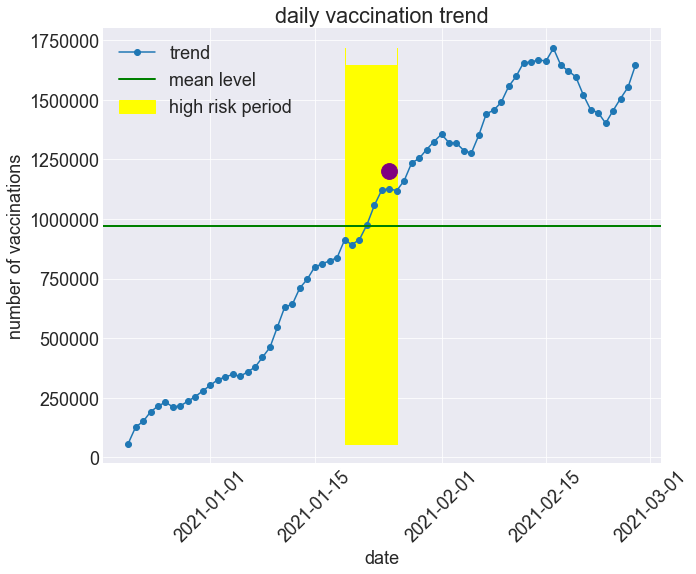

In [53]:
plt.figure(figsize=(10, 8))
plt.xlabel('date'); plt.ylabel('number of vaccinations'); plt.title('daily vaccination trend'); 
# change date to datetime
plt.plot(pd.to_datetime(us_vax['date'], format = '%Y-%m-%d').dt.date, us_vax['daily_vaccinations'], \
         marker='o', label='trend');
plt.xticks(rotation = 45); plt.legend(loc='upper left'); plt.grid();
plt.axhline(np.mean(us_vax['daily_vaccinations']), color='green', lw=2, label="mean level");

plt.fill_betweenx(us_vax['daily_vaccinations'], sorted(list(us_vax['date']))[30], \
                  sorted(list(us_vax['date']))[37], color='yellow', label='high risk period');
plt.scatter(sorted(list(us_vax['date']))[36], 1200000, s=250, color="purple", marker='o');
plt.style.use('seaborn-dark'); plt.legend();
plt.rcParams.update({'font.size': 18})